In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')

# Gaussian Distribution for MolGAN

In [2]:
test_sample_size = 5000
z_dim = 8

In [3]:
def sample_z(batch_size):
    return np.random.normal(0, 1, size=(batch_size, z_dim))

In [4]:
z = sample_z(test_sample_size)

<Figure size 4320x2160 with 0 Axes>

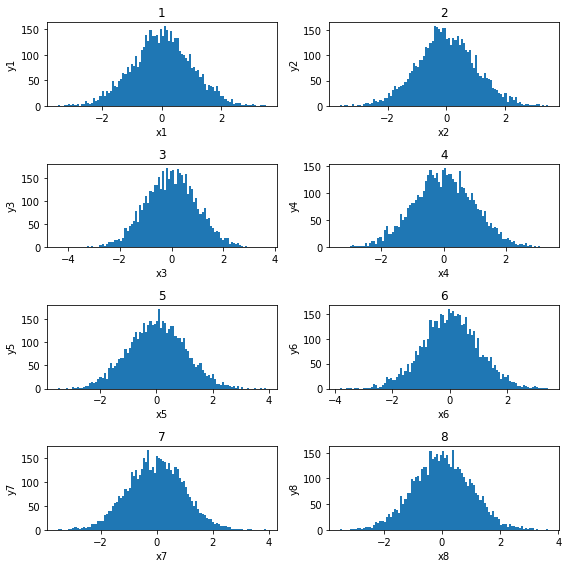

In [5]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4','x5','x6','x7','x8']
yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8']
titles = '12345678'
f,a = plt.subplots(4, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()

# Distributions for Quantum-GAN

In [6]:
import pennylane as qml
import random
import os
import pandas as pd
import torch

In [7]:
qubits = 8

layer = 3

In [8]:
dev = qml.device('default.qubit', wires=qubits)
@qml.qnode(dev, interface='torch', diff_method='backprop')
def gen_circuit(w):
    # random noise as generator input
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)
    
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
    for l in range(layer):
        for i in range(qubits):
            qml.RY(w[i], wires=i)
        for i in range(qubits-1):
            qml.CNOT(wires=[i, i+1])
            qml.RZ(w[i+qubits], wires=i+1)
            qml.CNOT(wires=[i, i+1])
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

resume_iters = 120
date = '20211110_110728'
model_dir_path = r'/home/ken/projects/QuantumGAN-PyTorch/results/quantum-GAN/'+date+'/train/model_dir'
weights_pth = os.path.join(model_dir_path, 'molgan_red_weights.csv')
weights = pd.read_csv(weights_pth, header=None).iloc[resume_iters-1, 1:].values

In [9]:
resume_iters = 11
model_dir_path = r'/home/ken/projects/QuantumGAN-PyTorch/results/quantum_circuit/layer_3/uniform'
weights_pth = os.path.join(model_dir_path, 'molgan_red_weights.csv')
weights = pd.read_csv(weights_pth, header=None).iloc[-1, 1:].values

In [10]:
gen_weights = torch.tensor(list(weights), requires_grad=True)

In [11]:
gen_weights

tensor([-1.6189,  1.5672,  1.7008,  1.7624, -1.8294, -1.7529, -1.5692,  1.5464,
         1.4319,  1.5866, -1.8385,  1.7058,  1.6689, -1.5739, -1.4978, -1.9892,
        -1.2300,  0.1555, -0.4276, -1.3117,  0.7028, -2.2651, -1.3060, -0.8397,
        -0.2760,  1.7918, -1.8870,  0.0894,  0.5807, -2.8497,  0.6757, -2.0702,
        -2.7329,  2.8204,  2.9257,  1.9377, -1.2276, -2.5279,  1.1576, -0.3760,
        -2.3748, -0.0303, -2.9255,  2.5718, -1.5156], dtype=torch.float64,
       requires_grad=True)

In [12]:
sample_list = [gen_circuit(gen_weights) for i in range(test_sample_size)]

In [13]:
z = torch.stack(tuple(sample_list)).float().detach().numpy()

<Figure size 4320x2160 with 0 Axes>

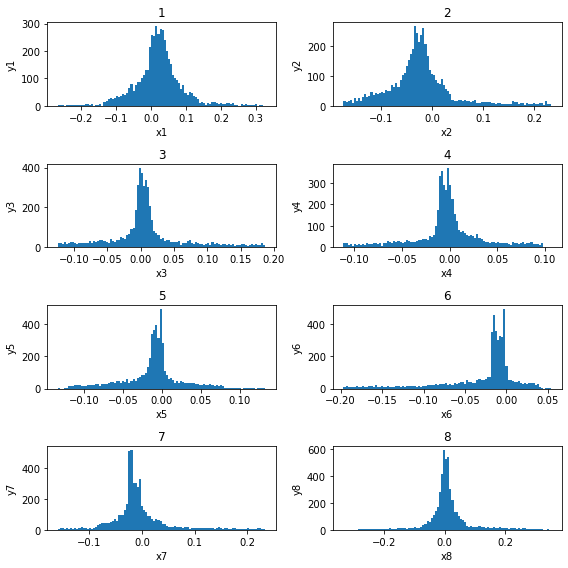

In [14]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4','x5','x6','x7','x8']
yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8']
titles = '12345678'
f,a = plt.subplots(4, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()